In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Reading the data

In [4]:
import os
os.chdir("C:\\Datatrained")


In [5]:
data=pd.read_csv('HR-Employee_Attrition.csv')

In [6]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

# Checking for missing values

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
data['target']=data['Attrition'].apply(lambda x:1 if x=='Yes' else 0)

In [9]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  StandardHours StockOptionLevel  TotalWorkingYears  \
0  ...             80                0                  8   
1  ...             80                1                 10   
2  ...             80                0                  7   
3  ...             80                0                  8   
4  ...             80                1                  6   

   TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                      0                1              6                   4   
1                      3                3             10                   7   
2                      3                3              0                   0   
3                      3                3              8                   7   
4                      3                3              2                   2   

  YearsSinceLastPromotion  YearsWithCurrManager  target  
0                       0                     5       1  
1                       1                     7       0  
2                       0                     0       1  
3                       3                     0       0  
4                       2                     2       0  

[5 rows x 36 columns]

# Removing Constant features

In [10]:
feat=[]
for i in data.columns:
    if data[i].nunique()==1:
        feat.append(i)
    

In [11]:
feat

['EmployeeCount', 'Over18', 'StandardHours']

In [12]:
data.drop(columns=feat,inplace=True)

In [13]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StockOptionLevel  \
0                        2  ...                        1                 0   
1                        3  ...                        4                 1   
2                        4  ...                        2                 0   
3                        4  ...                        3                 0   
4                        1  ...                        4                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  target  
0                  4                        0                     5       1  
1                  7                        1                     7       0  
2                  0                        0                     0       1  
3                  7                        3                     0       0  
4                  2                        2                     2       0  

[5 rows x 33 columns]

# Plot showing Target distribution across department and Education

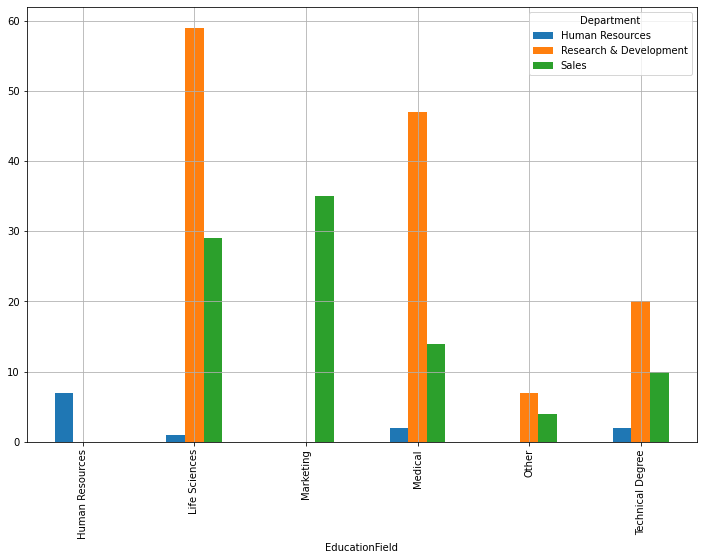

In [14]:
d1=data.groupby(['Department','EducationField'])['target'].sum().unstack('Department').plot(kind='bar',grid=True,figsize=(12,8))
plt.show()

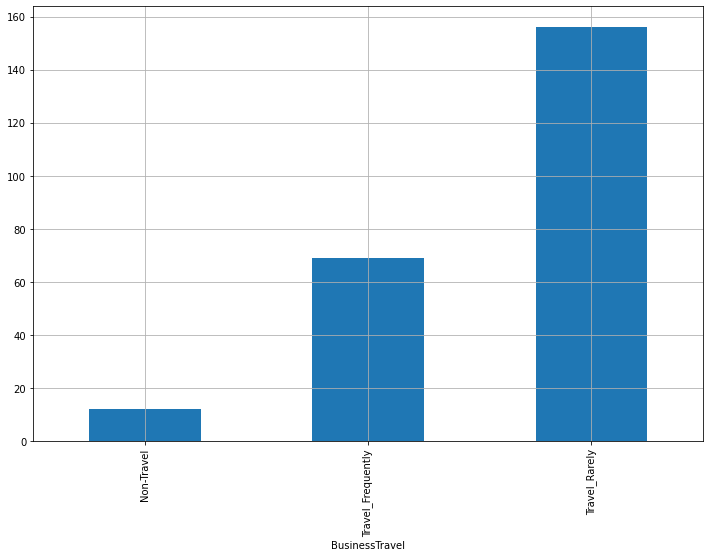

In [15]:
data.groupby(['BusinessTravel'])['target'].sum().plot(kind='bar',grid=True,figsize=(12,8))
plt.show()

In [16]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StockOptionLevel  \
0                        2  ...                        1                 0   
1                        3  ...                        4                 1   
2                        4  ...                        2                 0   
3                        4  ...                        3                 0   
4                        1  ...                        4                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  target  
0                  4                        0                     5       1  
1                  7                        1                     7       0  
2                  0                        0                     0       1  
3                  7                        3                     0       0  
4                  2                        2                     2       0  

[5 rows x 33 columns]

# Plot showing distribution across Buisness travel and department

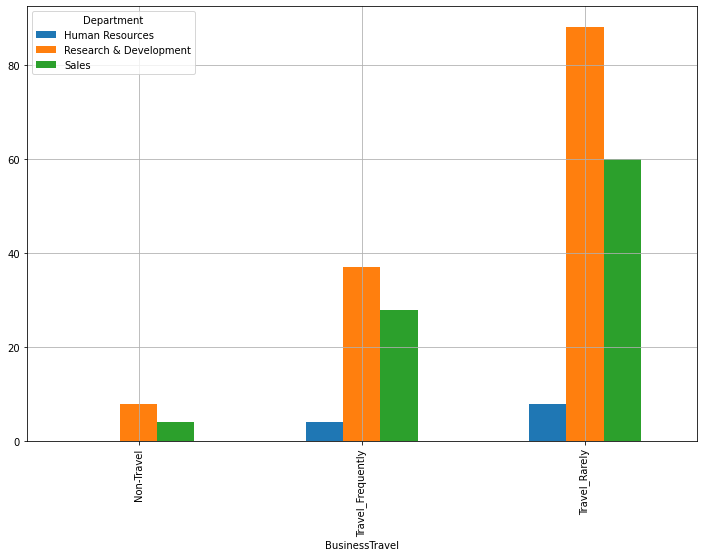

In [17]:
data.groupby(['BusinessTravel','Department'])['target'].sum().unstack('Department').plot(kind='bar',grid=True,figsize=(12,8))
plt.show()

In [18]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StockOptionLevel  \
0                        2  ...                        1                 0   
1                        3  ...                        4                 1   
2                        4  ...                        2                 0   
3                        4  ...                        3                 0   
4                        1  ...                        4                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  target  
0                  4                        0                     5       1  
1                  7                        1                     7       0  
2                  0                        0                     0       1  
3                  7                        3                     0       0  
4                  2                        2                     2       0  

[5 rows x 33 columns]

In [19]:
x=data.drop(columns=['Attrition','target'])
y=data['target']

In [20]:
enc=LabelEncoder()

In [21]:
cat_feat=[i for i in x.columns if x[i].dtype=='O']
cont_feat=[i for i in x.columns if x[i].dtype!='O']

# Label Encoding the categorical variables

In [22]:
for i in cat_feat:
    x[i]=enc.fit_transform(x[i])

In [23]:
x.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EmployeeNumber  EnvironmentSatisfaction  Gender  ...  \
0               1               1                        2       0  ...   
1               1               2                        3       1  ...   
2               4               4                        4       1  ...   
3               1               5                        4       0  ...   
4               3               7                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [24]:
scaler=StandardScaler()

# Scaling the data

In [25]:
x=scaler.fit_transform(x)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [27]:
def Prediction(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_pred,y_test)
    return score

# Using different models

In [28]:
logis_score=Prediction(LogisticRegression(),x_train,x_test,y_train,y_test)

In [29]:
rf_score=Prediction(RandomForestClassifier(),x_train,x_test,y_train,y_test)

In [30]:
gb_score=Prediction(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)

In [31]:
ADA_SCORE=Prediction(AdaBoostClassifier(),x_train,x_test,y_train,y_test)

In [32]:
xgb_Score=Prediction(xgb.XGBClassifier(),x_train,x_test,y_train,y_test)

C:\Users\Yasar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [33]:
result=pd.DataFrame({'Models':['Logisticregression','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','Xgboostclassifier'],
                    'Accuracy':[logis_score,rf_score,gb_score,ADA_SCORE,xgb_Score]})

# Final Result

In [34]:
result

Models  Accuracy
0          Logisticregression  0.868481
1      RandomForestClassifier  0.850340
2  GradientBoostingClassifier  0.857143
3          AdaBoostClassifier  0.879819
4           Xgboostclassifier  0.859410

# Tuning Adaboost Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
param={'max_depth':[2,3,4,10],'min_samples_leaf':[5,10,20,50],'criterion':['entropy','gini']}

In [37]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=5,scoring='accuracy')

In [38]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 10],
                         'min_samples_leaf': [5, 10, 20, 50]},
             scoring='accuracy')

In [39]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}

In [40]:
model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,min_samples_leaf=10,criterion='gini'))

In [41]:
l=[100,200,300,400]

In [42]:
for i in l:
    model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,min_samples_leaf=10,criterion='gini'),n_estimators=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_pred,y_test)
    print(score)

0.8503401360544217
0.8412698412698413
0.8344671201814059
0.8480725623582767


In [43]:
rate=[1,0.1,0.01,10]

In [44]:
for i in rate:
    model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,min_samples_leaf=10,criterion='gini'),n_estimators=300,
                            learning_rate=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_pred,y_test)
    print(score)

0.8503401360544217
0.8208616780045351
0.8503401360544217
0.7913832199546486


In [45]:
model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,min_samples_leaf=10,criterion='gini'),n_estimators=300,
                        learning_rate=1)

In [46]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.8594104308390023


In [47]:
from sklearn.metrics import classification_report

# Final Report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       371
           1       0.68      0.21      0.33        70

    accuracy                           0.86       441
   macro avg       0.78      0.60      0.62       441
weighted avg       0.84      0.86      0.83       441

